In [1]:
# EXPLORE TMDB MOVIE DATASET

The dataset I use is the tmdb movie dataset. I am interested in exploring the different characteristics that made blockbuster movies. I first examine the data structures and data types of the dataset. And then I create a function to extract the 'most xxx' movies every year. It can be most popular, highest rating scores and etc. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
tmdb = pd.read_csv('tmdb-movies.csv')

In [4]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [22]:
# Data Exploration and Data Cleaning

In [6]:
tmdb.rename(columns={'vote_average':'avg_vote_score'},inplace=True)

In [8]:
tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'avg_vote_score', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
tmdb_col_ifna = tmdb.isnull().any()

In [13]:
tmdb_col_ifna

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
avg_vote_score          False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [16]:
tmdb_na_num = tmdb.isnull().sum()

In [17]:
tmdb_na_num

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
avg_vote_score             0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
tmdb = tmdb.drop_duplicates()

In [21]:
tmdb.duplicated().sum()

0

In [24]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
avg_vote_score             0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Since there are a lot of NA values out of over about 10,000 entries, i decide to not just drop them all at once. Further exploration is necessary.

##### Question(1):  What are the most expensive movies and what are the most profitable movies every year?

In [26]:
tmdb['release_year'].isnull().sum()

0

In [27]:
# There is no NA values in release_year column, so we can group data by year

In [33]:
np.unique(tmdb['release_year'])

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [34]:
len(np.unique(tmdb['release_year']))

56

In [35]:
# From above, we can see there are 56 years in total.

In [46]:
#tmdb[tmdb.groupby(['release_year'])['avg_vote_score'].transform(max) == tmdb['avg_vote_score']]

In [48]:
def find_max_by_yr(dt, col):
    max_movie = tmdb[tmdb.groupby(['release_year'])[col].transform(max) == tmdb[col]]
    return max_movie.sort_values(by=['release_year'])

In [52]:
# movies with highest ratings each year
find_max_by_yr(tmdb,'avg_vote_score')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,avg_vote_score,release_year,budget_adj,revenue_adj
10141,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,...,When larcenous real estate clerk Marion Crane ...,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
10131,430,tt0055256,0.303783,3000000,4000000,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,Billy Wilder's Explosive New Comedy,...,"One, Two, Three â€“ A scorching business comed...",115,Comedy|Family,The Mirisch Corporation,12/15/61,30,7.5,1961,2.188458e+07,2.917944e+07
9852,595,tt0056592,0.810805,2000000,13129846,To Kill a Mockingbird,Gregory Peck|John Megna|Frank Overton|Rosemary...,NaN,Robert Mulligan,The most beloved Pulitzer Prize book now comes...,...,"In a small Alabama town in the 1930s, scrupulo...",129,Crime|Drama,Universal Pictures,12/25/62,317,7.7,1962,1.441690e+07,9.464582e+07
10446,5925,tt0057115,0.664326,4000000,5000000,The Great Escape,Steve McQueen|James Garner|Richard Attenboroug...,NaN,John Sturges,Put a fence in front of these men...and they'l...,...,"The Nazis, exasperated at the number of escape...",172,Adventure|Drama|History|Thriller|War,The Mirisch Corporation,6/20/63,409,7.5,1963,2.848072e+07,3.560090e+07
10441,4808,tt0056923,0.920094,4000000,13474588,Charade,Cary Grant|Audrey Hepburn|Walter Matthau|James...,NaN,Stanley Donen,You can expect the unexpected when they play.....,...,Regina Lambert returns to Paris from a ski hol...,113,Comedy|Mystery|Romance|Thriller,Universal Pictures,12/5/63,187,7.5,1963,2.848072e+07,9.594148e+07
9882,935,tt0057012,2.210475,1800000,9440272,Dr. Strangelove or: How I Learned to Stop Worr...,Peter Sellers|George C. Scott|Sterling Hayden|...,NaN,Stanley Kubrick,The hot-line suspense comedy,...,An insane general starts a process to nuclear ...,95,Drama|Comedy|War,Hawk Films|Columbia Pictures Corporation,1/29/64,804,7.7,1964,1.265448e+07,6.636764e+07
10693,13187,tt0059026,0.600975,0,0,A Charlie Brown Christmas,Ann Altieri|Chris Doran|Sally Dryer|Bill Melen...,NaN,Bill Melendez,"That's what Christmas is all about, Charlie Br...",...,When Charlie Brown complains about the overwhe...,25,Animation|Family|Comedy|TV Movie,Warner Bros. Home Video,12/9/65,84,7.6,1965,0.000000e+00,0.000000e+00
10842,36540,tt0061199,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,NaN,Wolfgang Reitherman,NaN,...,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.000000e+00,0.000000e+00
10402,475,tt0061418,1.022408,2500000,50700000,Bonnie and Clyde,Warren Beatty|Faye Dunaway|Michael J. Pollard|...,NaN,Arthur Penn,Theyâ€™re youngâ€¦ theyâ€™re in loveâ€¦ and th...,...,Bonnie and Clyde is based on the true stories ...,111,Crime|Drama,Tatira-Hiller Productions|Warner Brothers/Seve...,7/18/67,153,7.6,1967,1.634191e+07,3.314139e+08
9719,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,NaN,Stanley Kubrick,An epic drama of adventure and exploration,...,Humanity finds a mysterious object buried bene...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,4/5/68,1708,7.7,1968,7.522756e+07,3.555466e+08


In [53]:
# movies with highest budget each year
find_max_by_yr(tmdb,'budget_adj')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,avg_vote_score,release_year,budget_adj,revenue_adj
10143,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,...,Spartacus is a 1960 American historical drama ...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08
10112,1725,tt0055614,0.900245,6000000,43656822,West Side Story,Natalie Wood|Richard Beymer|Russ Tamblyn|Rita ...,NaN,Jerome Robbins|Robert Wise,The screen achieves one of the great entertain...,...,In the slums of the upper West Side of Manhatt...,152,Music|Crime|Drama,United Artists|20th Century Fox Home Entertain...,10/18/61,192,6.6,1961,4.376917e+07,3.184705e+08
10113,10911,tt0054953,0.754548,6000000,28900000,The Guns of Navarone,Gregory Peck|David Niven|Anthony Quinn|Stanley...,NaN,J. Lee Thompson|Alexander Mackendrick,The Greatest High Adventure Ever Filmed!,...,A team of allied saboteurs are assigned an imp...,158,Action|Adventure|Drama|War,Columbia Pictures,4/27/61,95,7.0,1961,4.376917e+07,2.108215e+08
10130,18647,tt0055257,0.173731,6000000,4300000,One-Eyed Jacks,Marlon Brando|Karl Malden|Katy Jurado|Pina Pel...,NaN,Marlon Brando,NaN,...,Running from the law after a bank robbery in M...,141,Western|Action,Pennebaker Productions,3/30/61,17,6.1,1961,4.376917e+07,3.136790e+07
9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,A Mighty Motion Picture Of Action And Adventure!,...,An epic about British officer T.E. Lawrence's ...,216,Adventure|Drama|History|War,Horizon Pictures (II),12/10/62,517,7.5,1962,1.081267e+08,5.045914e+08
9856,11897,tt0056085,0.526108,15000000,50000000,How the West Was Won,Carroll Baker|Lee J. Cobb|Henry Fonda|Carolyn ...,NaN,John Ford|Henry Hathaway|George Marshall|Richa...,It's here! The mightiest adventure ever filmed!,...,The epic tale of the development of the Americ...,162,Western|Action|Adventure|Drama,Metro-Goldwyn-Mayer (MGM),11/1/62,37,6.1,1962,1.081267e+08,3.604224e+08
10443,8095,tt0056937,0.804533,31115000,57750000,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,NaN,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,The motion picture the world has been waiting ...,...,Historical epic. The triumphs and tragedy of t...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,6/12/63,68,6.3,1963,2.215444e+08,4.111904e+08
9887,11113,tt0058385,0.633882,17000000,72000000,My Fair Lady,Audrey Hepburn|Rex Harrison|Stanley Holloway|W...,NaN,George Cukor,The loverliest motion picture of them all!,...,A misogynistic and snobbish phonetics professo...,170,Drama|Family|Music|Romance,Warner Bros.,10/21/64,184,7.1,1964,1.195145e+08,5.061793e+08
10716,2428,tt0059245,0.146033,20000000,12000000,The Greatest Story Ever Told,Max von Sydow|Michael Anderson Jr.|Carroll Bak...,NaN,George Stevens,NaN,...,All-star epic retelling of Christ's life.,199,Drama|History,George Stevens Productions,2/15/65,13,5.7,1965,1.384113e+08,8.304676e+07
10824,2525,tt0060164,0.533292,18000000,0,The Bible: In the Beginning...,Michael Parks|Ulla Bergryd|Richard Harris|Fran...,NaN,John Huston,The unforgettable adventure of Man from the Cr...,...,Extravagant production of the first part of th...,174,Drama,Seven Arts Productions|Dino de Laurentiis Cine...,9/28/66,18,5.8,1966,1.209243e+08,0.000000e+00


In [54]:
# movies with highest revenue each year
find_max_by_yr(tmdb,'revenue_adj')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,avg_vote_score,release_year,budget_adj,revenue_adj
10143,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,...,Spartacus is a 1960 American historical drama ...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,A Mighty Motion Picture Of Action And Adventure!,...,An epic about British officer T.E. Lawrence's ...,216,Adventure|Drama|History|War,Horizon Pictures (II),12/10/62,517,7.5,1962,1.081267e+08,5.045914e+08
10438,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,...,Agent 007 is back in the second installment of...,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08
9881,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,2.460594e+07,8.780804e+08
10690,15121,tt0059742,1.313676,8200000,163214286,The Sound of Music,Julie Andrews|Christopher Plummer|Eleanor Park...,NaN,Robert Wise,The happiest sound in all the world!,...,Film adaptation of a classic Rodgers and Hamme...,174,Drama|Family|Music|Romance,Robert Wise Productions|Argyle Enterprises,3/2/65,620,7.2,1965,5.674862e+07,1.129535e+09
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10398,9325,tt0061852,2.550704,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,NaN,Wolfgang Reitherman,The Jungle is JUMPIN'!,...,The Jungle Book follows the ups and downs of t...,78,Family|Animation|Adventure,Walt Disney Pictures,10/18/67,928,7.0,1967,2.614705e+07,1.345551e+09
9719,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,NaN,Stanley Kubrick,An epic drama of adventure and exploration,...,Humanity finds a mysterious object buried bene...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,4/5/68,1708,7.7,1968,7.522756e+07,3.555466e+08
10725,642,tt0064115,1.357317,6000000,102308889,Butch Cassidy and the Sundance Kid,Paul Newman|Robert Redford|Katharine Ross|Stro...,NaN,George Roy Hill,"Not that it matters, but most of it is true.",...,"In late 1890s Wyoming, Butch Cassidy is the af...",110,History|Drama|Western|Crime,Twentieth Century Fox Film Corporation|Campani...,9/23/69,379,7.0,1969,3.566559e+07,6.081511e+08


In [123]:
# movies with highest revenue each year
find_max_by_yr(tmdb,'popularity')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,avg_vote_score,release_year,budget_adj,revenue_adj,0,1,2,3,4
10141,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,...,1180,8.0,1960,5.949601e+06,2.359350e+08,Drama,Horror,Thriller,None,None
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,913,6.6,1961,2.917944e+07,1.574815e+09,Adventure,Animation,Comedy,Family,None
9849,646,tt0055928,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,...,560,6.7,1962,7.929294e+06,4.296236e+08,Adventure,Action,Thriller,None,None
10438,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,...,458,6.7,1963,1.780045e+07,5.617734e+08,Action,Thriller,Adventure,None,None
9881,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,...,602,7.0,1964,2.460594e+07,8.780804e+08,Adventure,Action,Thriller,None,None
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,331,6.3,1965,7.612620e+07,9.771535e+08,Adventure,Action,Thriller,None,None
10820,13377,tt0060345,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,NaN,Chuck Jones|Ben Washam,"You're a mean one, Mr. Grinch",...,286,7.1,1966,2.116175e+06,0.000000e+00,Animation,Family,Comedy,None,None
10398,9325,tt0061852,2.550704,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,NaN,Wolfgang Reitherman,The Jungle is JUMPIN'!,...,928,7.0,1967,2.614705e+07,1.345551e+09,Family,Animation,Adventure,None,None
9719,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,NaN,Stanley Kubrick,An epic drama of adventure and exploration,...,1708,7.7,1968,7.522756e+07,3.555466e+08,Science Fiction,Mystery,Adventure,None,None
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,258,6.4,1969,4.160985e+07,4.872780e+08,Adventure,Action,Thriller,None,None


In [93]:
# How to unstack the genre and calculate the counts by year?

In [97]:
tmdb.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,avg_vote_score,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [101]:
genre = tmdb['genres'].str.split('|',expand=True)
A = genre[0].value_counts().sort_index()
B = genre[1].value_counts().sort_index()
C = genre[2].value_counts().sort_index()
D = genre[3].value_counts().sort_index()
E = genre[4].value_counts().sort_index()

In [117]:
genre_ttl_cnt = A+B+C+D
genre_ttl_cnt.add(E,fill_value=0)

Action             2384.0
Adventure          1471.0
Animation           699.0
Comedy             3793.0
Crime              1354.0
Documentary         520.0
Drama              4760.0
Family             1231.0
Fantasy             916.0
Foreign             188.0
History             334.0
Horror             1637.0
Music               408.0
Mystery             810.0
Romance            1712.0
Science Fiction    1229.0
TV Movie            167.0
Thriller           2907.0
War                 270.0
Western             165.0
dtype: float64

[Text(0,0.5,'Number of Movies'), Text(0.5,0,'genres')]

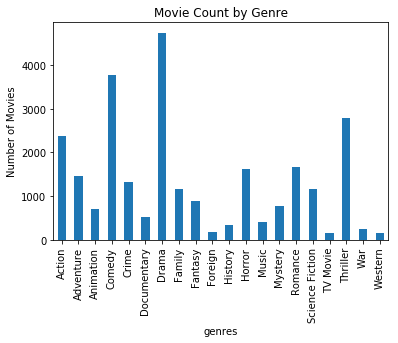

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
genre_ttl_cnt.plot.bar(title="Movie Count by Genre").set(xlabel='genres',ylabel='Number of Movies')

In [125]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 26 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
avg_vote_score          10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [126]:
highest_rev_movie = find_max_by_yr(tmdb,'revenue_adj')

In [139]:
highest_rev_movie['director'].value_counts()[:7]

Steven Spielberg    6
Peter Jackson       3
James Cameron       3
George Lucas        2
Stanley Kubrick     2
Guy Hamilton        2
Gore Verbinski      2
Name: director, dtype: int64

The above are all the directors that have more than one highest revenue movies. They seem to be relatively more reliable in producing high revenue movies.

In [141]:
A = highest_rev_movie[0].value_counts().sort_index()
B = highest_rev_movie[1].value_counts().sort_index()
C = highest_rev_movie[2].value_counts().sort_index()
D = highest_rev_movie[3].value_counts().sort_index()
E = highest_rev_movie[4].value_counts().sort_index()

In [147]:
sumAB = A.add(B,fill_value = 0)
sumCD = C.add(D,fill_value = 0)
count_of_each_genre = (sumAB + sumCD).add(E, fill_value = 0)
count_of_each_genre

Action             27.0
Adventure          37.0
Animation           NaN
Comedy              6.0
Crime               4.0
Drama              17.0
Family             13.0
Fantasy            15.0
History             3.0
Horror              NaN
Music               2.0
Mystery             3.0
Romance             7.0
Science Fiction    17.0
Thriller           14.0
War                 NaN
Western             2.0
dtype: float64

From above, we can see that 'Adventure', 'Action', 'Drama', 'Drama','Fantasy' are the top five genres among the highest revenues movies.  

In [151]:
highest_budget_movie = find_max_by_yr(tmdb,'budget_adj')
highest_budget_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,avg_vote_score,release_year,budget_adj,revenue_adj,0,1,2,3,4
10143,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,...,211,6.9,1960,8.847561e+07,4.423780e+08,Action,Drama,History,None,None
10112,1725,tt0055614,0.900245,6000000,43656822,West Side Story,Natalie Wood|Richard Beymer|Russ Tamblyn|Rita ...,NaN,Jerome Robbins|Robert Wise,The screen achieves one of the great entertain...,...,192,6.6,1961,4.376917e+07,3.184705e+08,Music,Crime,Drama,None,None
10113,10911,tt0054953,0.754548,6000000,28900000,The Guns of Navarone,Gregory Peck|David Niven|Anthony Quinn|Stanley...,NaN,J. Lee Thompson|Alexander Mackendrick,The Greatest High Adventure Ever Filmed!,...,95,7.0,1961,4.376917e+07,2.108215e+08,Action,Adventure,Drama,War,None
10130,18647,tt0055257,0.173731,6000000,4300000,One-Eyed Jacks,Marlon Brando|Karl Malden|Katy Jurado|Pina Pel...,NaN,Marlon Brando,NaN,...,17,6.1,1961,4.376917e+07,3.136790e+07,Western,Action,None,None,None
9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,A Mighty Motion Picture Of Action And Adventure!,...,517,7.5,1962,1.081267e+08,5.045914e+08,Adventure,Drama,History,War,None


In [162]:
#highest_budget_movie.id == highest_rev_movie.id
# How to compare if movies with highest budget and highest revenues are the same?

In [161]:
highest_budget_movie.id

10143       967
10112      1725
10113     10911
10130     18647
9850        947
9856      11897
10443      8095
9887      11113
10716      2428
10824      2525
10409      1654
9719         62
10730     11463
10656     11165
9931      12335
7272      10784
7269        238
10593     11886
9785       5919
9836      17599
10218     23479
1335       5902
1364      38985
10758      1924
7851      11519
7828        152
7315       8536
8426      26843
8920      15739
7993       1621
          ...  
9317        280
8245        364
10230      9593
4186      36955
8089       9804
8464      10545
8467       9268
5231        597
8995        944
8970         95
2434       8487
8671      10567
2642        676
3926      36669
3919        608
3925       9016
4959        296
7012        558
6215        254
6570       1452
7387        285
2902       2454
1389        767
2244      46528
3375       1865
4411      49529
5508      57201
643      127585
634      122917
14        99861
Name: id, Length: 67, dt